In [ ]:
import pandas as pd

dataset = pd.read_csv('adult.data')

In [ ]:
dataset.columns = ['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-number', 'Marital-status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss'
                  , 'Hours-per-week', 'Native-country', 'Income']

In [ ]:
eda_dataset = dataset
original_dataset = dataset
dataset

,Age,Workclass,fnlwgt,Education,Education-number,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


#Data Pre Processing

##Check for null values

In [ ]:
#To check if there are any null values, I will use the isna() function of pandas which returns a 1 if null value is spotted

dataset.isna().sum()

Age                 0
Workclass           0
fnlwgt              0
Education           0
Education-number    0
Marital-status      0
Occupation          0
Relationship        0
Race                0
Sex                 0
Capital-gain        0
Capital-loss        0
Hours-per-week      0
Native-country      0
Income              0
dtype: int64

##Check for outliers

###Categorical Data visualized using histogram

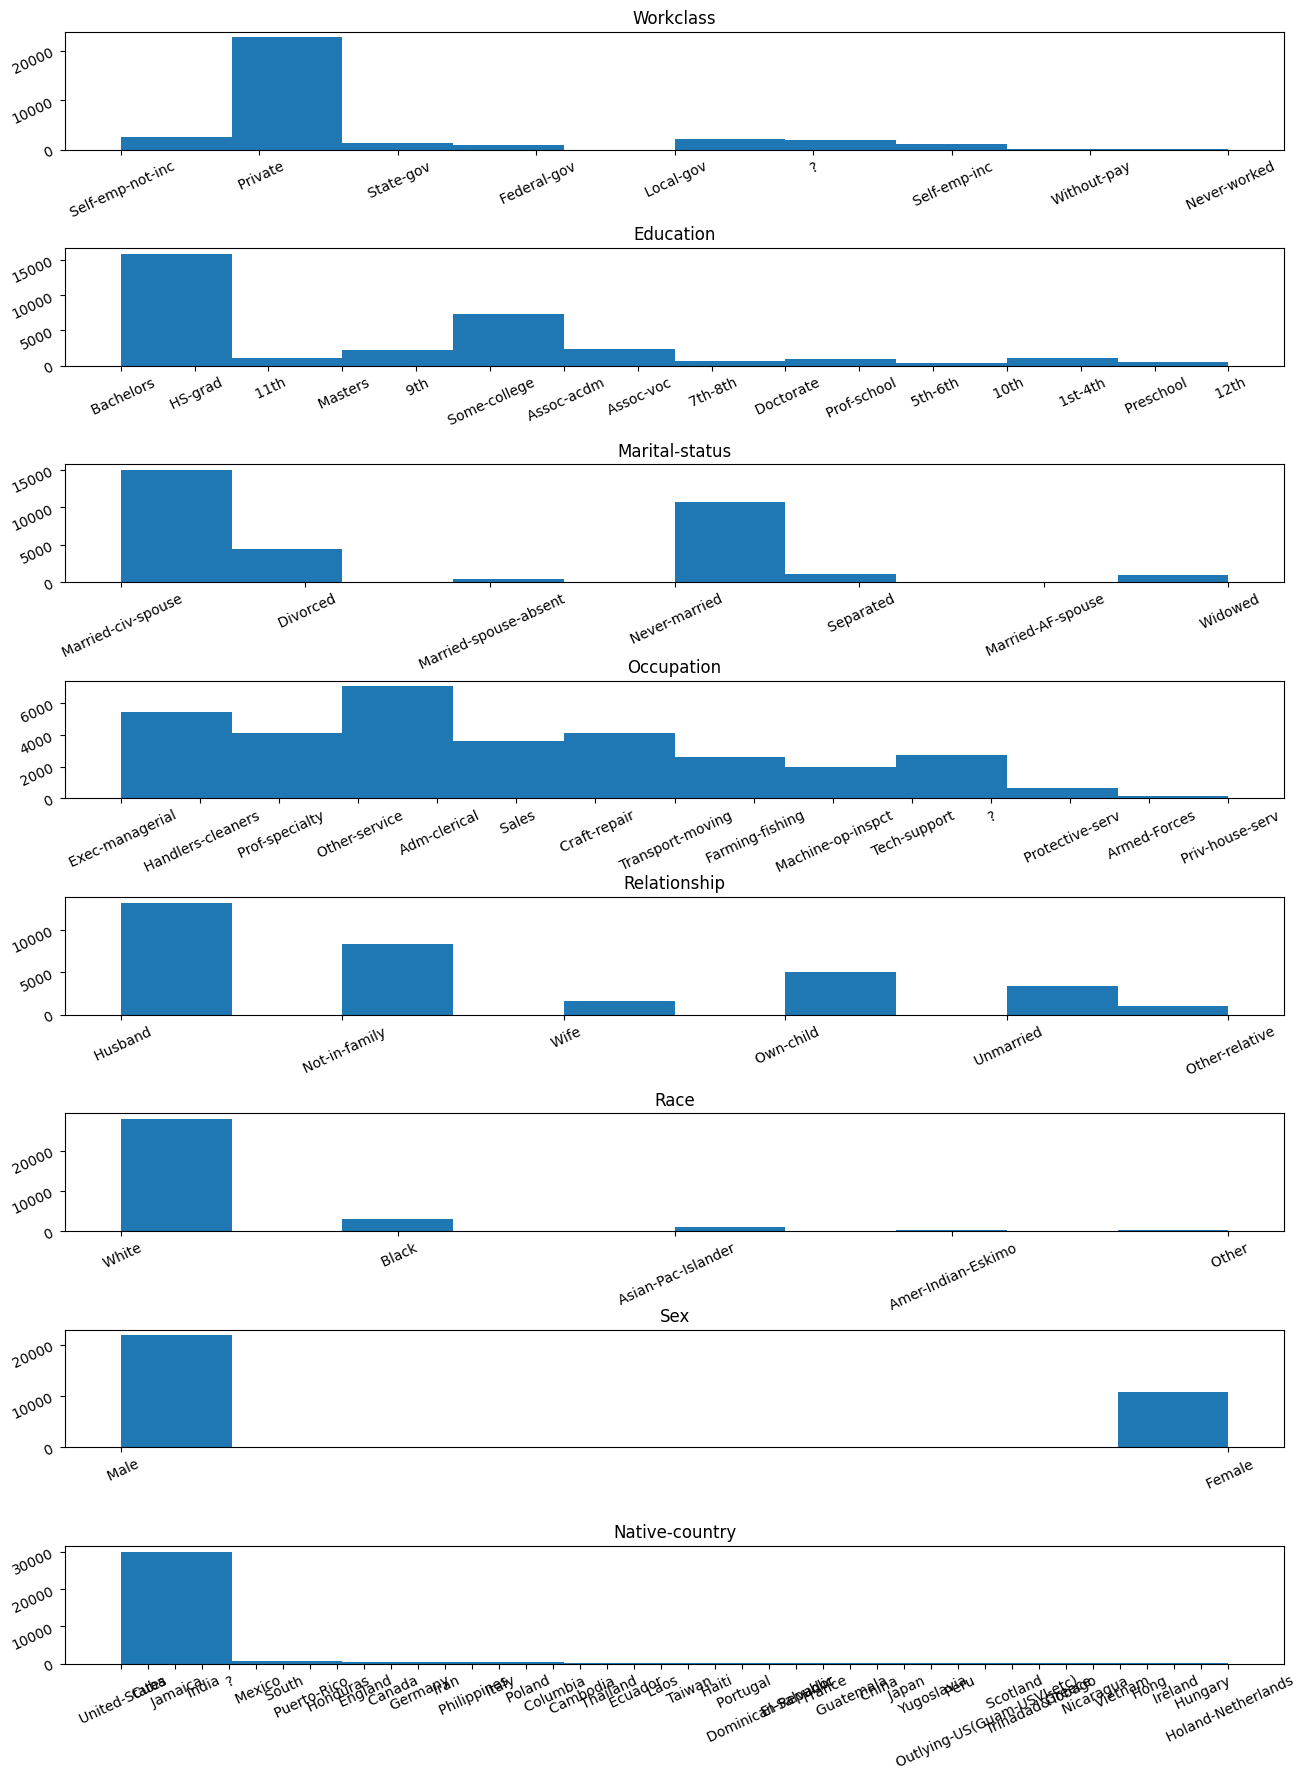

In [ ]:
import matplotlib.pyplot as plt

cols = ['Workclass',  'Education', 'Marital-status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native-country']

fig, axs = plt.subplots(8, 1, figsize=(14,18))
fig.tight_layout(pad=5.0)

for i in range(0, len(cols)):
  axs[i].hist(dataset[cols[i]])
  axs[i].set_title(cols[i])
  axs[i].tick_params(labelrotation=25)

###Continuous Data visualized using plots

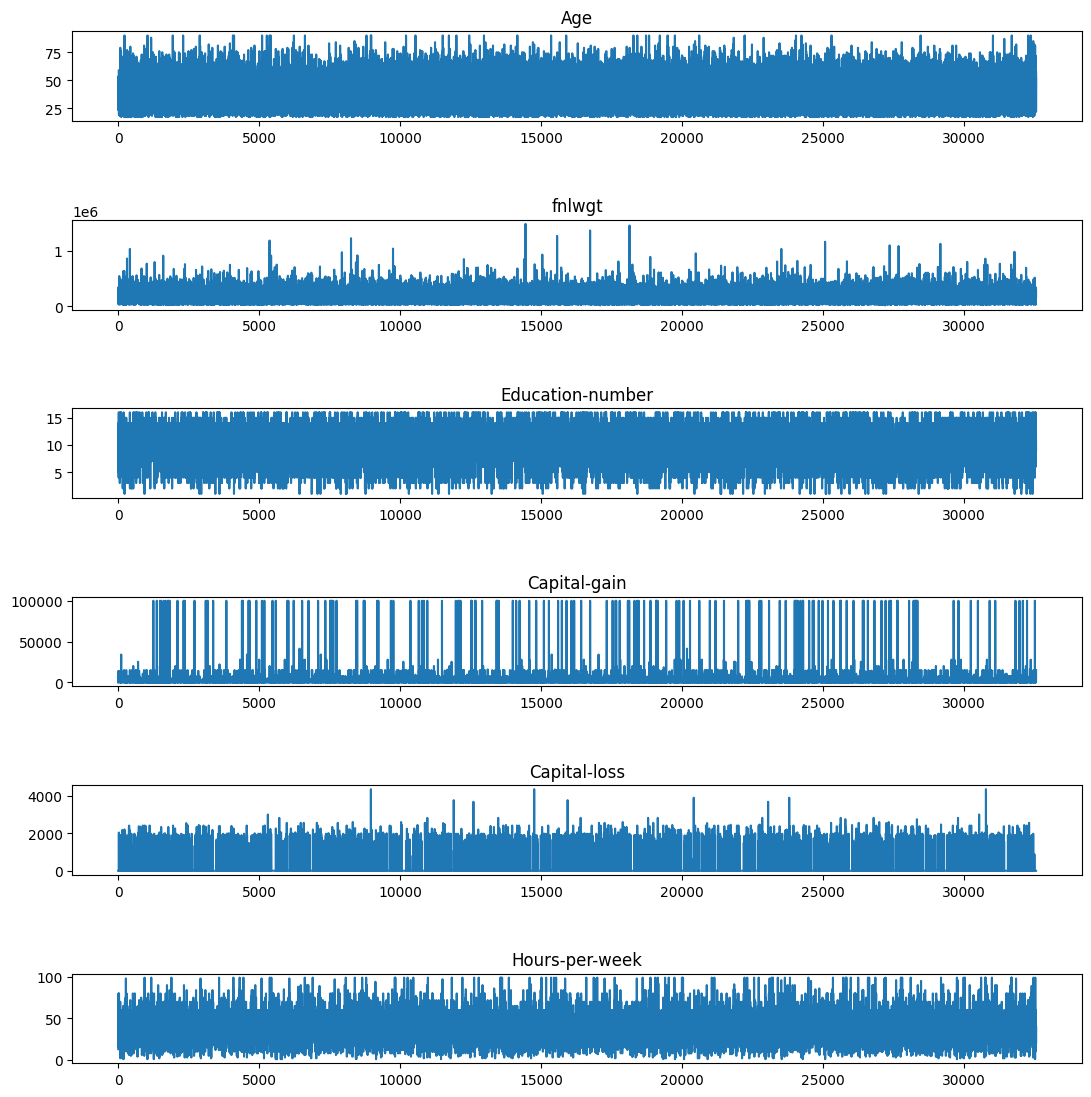

In [ ]:

cols = ['Age', 'fnlwgt', 'Education-number','Capital-gain', 'Capital-loss', 'Hours-per-week',]

fig, axs = plt.subplots(6, 1, figsize=(12,12))
fig.tight_layout(pad=5.0)

for i in range(0, len(cols)):
  axs[i].plot(dataset[cols[i]])
  axs[i].set_title(cols[i])

##Check if Label is balanced


In [ ]:
import numpy as np

dataset['Income'] = np.where(dataset['Income'] == ' <=50K', 0, 1)

0    24719
1     7841
Name: Income, dtype: int64


(array([24719.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  7841.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

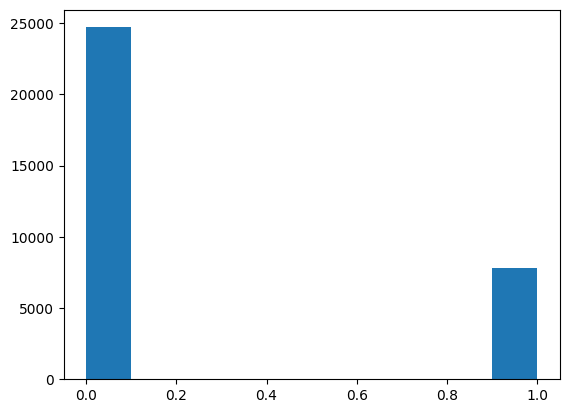

In [ ]:
print(dataset['Income'].value_counts())
plt.hist(dataset['Income'])

From above plot, we can see that this is an imbalanced dataset. To balance the data, I have used resample from sklearn.

In [ ]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_minority = dataset[(dataset['Income']==1)] 
df_majority = dataset[(dataset['Income']==0)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 24719, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
dataset = pd.concat([df_minority_upsampled, df_majority])

In [ ]:
dataset['Income'].value_counts()

1    24719
0    24719
Name: Income, dtype: int64

##Encoding categorical features

In [ ]:
len(np.where(dataset['Native-country']==' Hungary')[0])

16

In [ ]:
cols = ['Workclass',  'Education', 'Marital-status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native-country']

dataset_cat = dataset[cols]

In [ ]:
for i in range(0,len(cols)):
  print(cols[i])
  print(dataset_cat[cols[i]].unique())

Workclass
[' Private' ' ?' ' Self-emp-inc' ' Local-gov' ' State-gov' ' Federal-gov'
 ' Self-emp-not-inc' ' Without-pay' ' Never-worked']
Education
[' Some-college' ' Prof-school' ' Masters' ' Doctorate' ' HS-grad'
 ' Bachelors' ' 10th' ' 11th' ' 9th' ' Assoc-acdm' ' Assoc-voc' ' 7th-8th'
 ' 5th-6th' ' 1st-4th' ' 12th' ' Preschool']
Marital-status
[' Married-civ-spouse' ' Separated' ' Never-married' ' Divorced'
 ' Widowed' ' Married-AF-spouse' ' Married-spouse-absent']
Occupation
[' Machine-op-inspct' ' ?' ' Exec-managerial' ' Prof-specialty' ' Sales'
 ' Protective-serv' ' Transport-moving' ' Craft-repair' ' Tech-support'
 ' Adm-clerical' ' Farming-fishing' ' Handlers-cleaners' ' Other-service'
 ' Armed-Forces' ' Priv-house-serv']
Relationship
[' Husband' ' Wife' ' Not-in-family' ' Own-child' ' Other-relative'
 ' Unmarried']
Race
[' White' ' Asian-Pac-Islander' ' Black' ' Amer-Indian-Eskimo' ' Other']
Sex
[' Male' ' Female']
Native-country
[' United-States' ' Germany' ' ?' ' China' ' Ph

Replace 1st-12th std in education with the category School to reduce the number of categories.

In [ ]:
education_dict = {
    ' Some-college': ' Some-college',
    ' Prof-school': ' Prof-school',
    ' Masters': ' Masters',
    ' Doctorate': ' Doctorate',
    ' HS-grad': ' HS-grad',
    ' Bachelors': ' Bachelors',
    ' 10th': 'School',
    ' 11th': 'School',
    ' 9th': 'School',
    ' Assoc-acdm': ' Assoc-acdm',
    ' Assoc-voc': ' Assoc-voc',
    ' 7th-8th': 'School',
    ' 5th-6th': 'School',
    ' 1st-4th': 'School',
    ' 12th': 'School',
    ' Preschool':' Preschool'
}

In [ ]:
dataset_cat["Education"].replace(education_dict, inplace=True)

<ipython-input-15-643b846a22e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_cat["Education"].replace(education_dict, inplace=True)


In [ ]:
#Now to encode, we will create a dictionary to map the words to integer values. We will replace all categories with 0 records with the same integer as it will have no effect on the model,
#so we don't need to create seperate columns for them while one-hot encoding

dataset_cat

,Workclass,Education,Marital-status,Occupation,Relationship,Race,Sex,Native-country
30317,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
31590,?,Prof-school,Married-civ-spouse,?,Husband,White,Male,United-States
3465,Private,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
22591,Self-emp-inc,Doctorate,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States
21926,Private,Some-college,Married-civ-spouse,Prof-specialty,Wife,Asian-Pac-Islander,Female,United-States
...,...,...,...,...,...,...,...,...
32552,Private,Masters,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,Taiwan
32554,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,United-States
32555,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
32557,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States


In [ ]:
dataset_cat_one_hot = pd.concat([pd.get_dummies(dataset_cat['Workclass']), pd.get_dummies(dataset_cat['Education']), pd.get_dummies(dataset_cat['Marital-status']),pd.get_dummies(dataset_cat['Occupation'])
,pd.get_dummies(dataset_cat['Relationship']),pd.get_dummies(dataset_cat['Race']),pd.get_dummies(dataset_cat['Sex']),pd.get_dummies(dataset_cat['Native-country'])], axis = 1)
dataset_cat_one_hot

,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,Assoc-acdm,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
30317,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31590,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3465,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
22591,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
21926,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32552,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
32554,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32555,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32557,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
dataset_cat_one_hot.reset_index(drop= True, inplace= True)
dataset_cat_one_hot

,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,Assoc-acdm,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49433,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
49434,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
49435,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
49436,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


##Normalizing Continuous Features

In [ ]:
cols = ['Age', 'fnlwgt', 'Education-number','Capital-gain', 'Capital-loss', 'Hours-per-week',]

dataset_num = dataset[cols]

In [ ]:
dataset_num

,Age,fnlwgt,Education-number,Capital-gain,Capital-loss,Hours-per-week
30317,39,58343,10,0,0,40
31590,72,108796,15,0,0,40
3465,39,96452,14,0,0,55
22591,48,382242,16,0,0,40
21926,30,89625,10,0,0,5
...,...,...,...,...,...,...
32552,32,116138,14,0,0,11
32554,22,310152,10,0,0,40
32555,27,257302,12,0,0,38
32557,58,151910,9,0,0,40


I have decided to scale the data using StandardScaler which is more resistant to outliers found in the data as compared to MinMaxScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(dataset_num)
dataset_num_scaled = scaler.transform(dataset_num)

In [ ]:
dataset_num_scaled_df = pd.DataFrame(dataset_num_scaled)
dataset_num_scaled_df.columns = cols
dataset_num_scaled_df

,Age,fnlwgt,Education-number,Capital-gain,Capital-loss,Hours-per-week
0,-0.112277,-1.243325,-0.226314,-0.194166,-0.261609,-0.175086
1,2.442560,-0.766658,1.688278,-0.194166,-0.261609,-0.175086
2,-0.112277,-0.883281,1.305359,-0.194166,-0.261609,1.065844
3,0.584497,1.816788,2.071196,-0.194166,-0.261609,-0.175086
4,-0.809050,-0.947781,-0.226314,-0.194166,-0.261609,-3.070590
...,...,...,...,...,...,...
49433,-0.654212,-0.697293,1.305359,-0.194166,-0.261609,-2.574218
49434,-1.428405,1.135700,-0.226314,-0.194166,-0.261609,-0.175086
49435,-1.041308,0.636387,0.539523,-0.194166,-0.261609,-0.340543
49436,1.358690,-0.359329,-0.609232,-0.194166,-0.261609,-0.175086


##Combined the continuous and categorical dataframes

In [ ]:
df = pd.concat([dataset_num_scaled_df, dataset_cat_one_hot], axis=1)
df

,Age,fnlwgt,Education-number,Capital-gain,Capital-loss,Hours-per-week,?,Federal-gov,Local-gov,Never-worked,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,-0.112277,-1.243325,-0.226314,-0.194166,-0.261609,-0.175086,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2.442560,-0.766658,1.688278,-0.194166,-0.261609,-0.175086,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.112277,-0.883281,1.305359,-0.194166,-0.261609,1.065844,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.584497,1.816788,2.071196,-0.194166,-0.261609,-0.175086,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.809050,-0.947781,-0.226314,-0.194166,-0.261609,-3.070590,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49433,-0.654212,-0.697293,1.305359,-0.194166,-0.261609,-2.574218,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
49434,-1.428405,1.135700,-0.226314,-0.194166,-0.261609,-0.175086,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
49435,-1.041308,0.636387,0.539523,-0.194166,-0.261609,-0.340543,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
49436,1.358690,-0.359329,-0.609232,-0.194166,-0.261609,-0.175086,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#Data Visualization

##Check correlation between the features

In [ ]:
dataset.head()

,Age,Workclass,fnlwgt,Education,Education-number,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
30317,39,Private,58343,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
31590,72,?,108796,Prof-school,15,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,1
3465,39,Private,96452,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,55,United-States,1
22591,48,Self-emp-inc,382242,Doctorate,16,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,1
21926,30,Private,89625,Some-college,10,Married-civ-spouse,Prof-specialty,Wife,Asian-Pac-Islander,Female,0,0,5,United-States,1


<ipython-input-25-ed869f71bf96>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr(),


<Axes: >

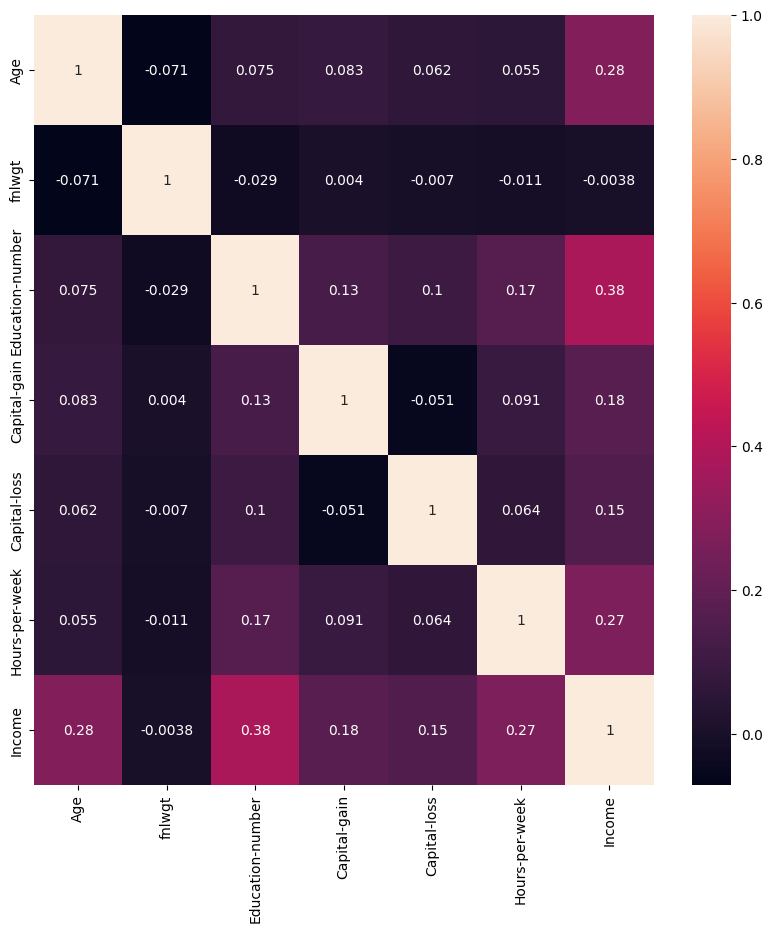

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap( 
            dataset.corr(),
            
            annot=True
)

Based on this, there is no strong correlation between the numerical features

##Check category wise distribution of incomes to get a better idea of the trends/patterns in data

In [ ]:
dataset.head()

,Age,Workclass,fnlwgt,Education,Education-number,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
30317,39,Private,58343,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
31590,72,?,108796,Prof-school,15,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,1
3465,39,Private,96452,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,55,United-States,1
22591,48,Self-emp-inc,382242,Doctorate,16,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,1
21926,30,Private,89625,Some-college,10,Married-civ-spouse,Prof-specialty,Wife,Asian-Pac-Islander,Female,0,0,5,United-States,1


###Income distribution over Age groups

In [ ]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    else:
        return "Greater than 60"

eda_dataset['age_group'] = eda_dataset['Age'].apply(age_group)

Text(0.5, 1.0, 'Income of Individuals of Different Age Groups')

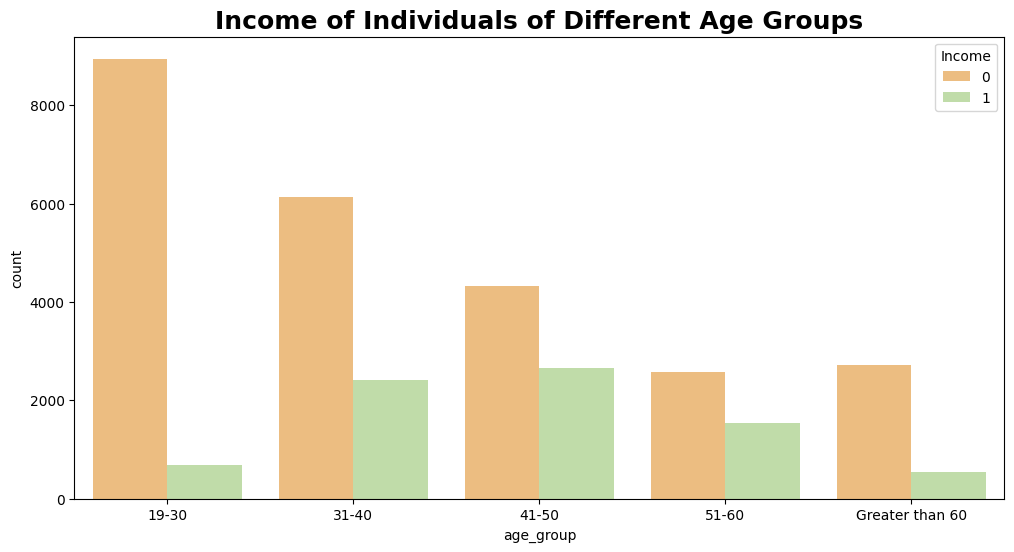

In [ ]:
plt.figure(figsize=(12,6))   
order_list = ['19-30', '31-40', '41-50', '51-60', 'Greater than 60']
sns.countplot(data = eda_dataset, x = 'age_group', hue = 'Income', palette='Spectral', order = order_list)
plt.title('Income of Individuals of Different Age Groups', fontsize=18, fontweight='bold')

The label 1 corresponds to salary >= 50k, whereas 0 corresponds to salary < 50k. From this plot we see that the salary keeps on increasing (inferred from increase in amount of people classified as 1) as they get older till age 50, when people start thinking about retirement. This feature could be useful in algorithms such as k-means.

###Income distribution over work classes


Text(0.5, 1.0, 'Income of Individuals belonging to different work classes')

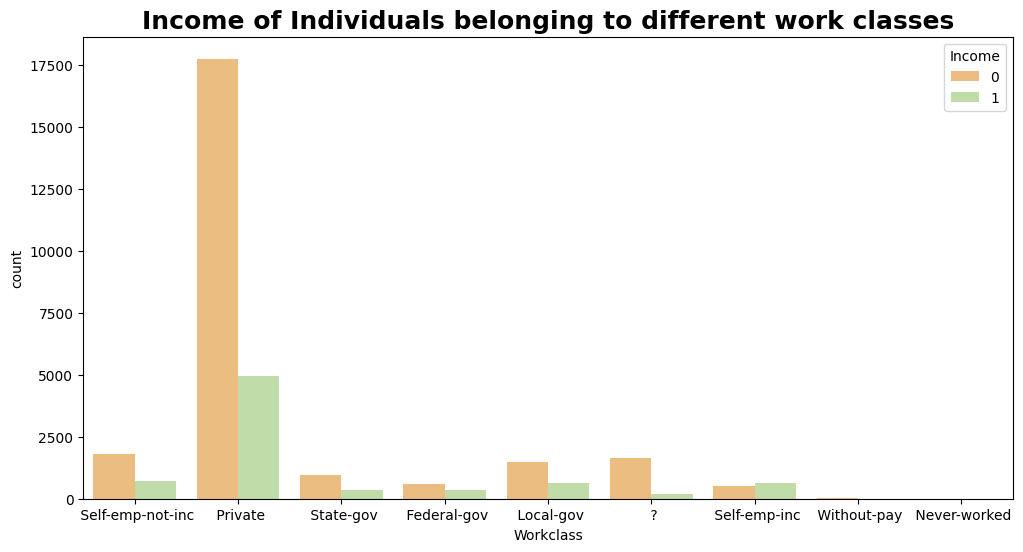

In [ ]:
plt.figure(figsize=(12,6))   
sns.countplot(data = eda_dataset, x = 'Workclass', hue = 'Income', palette='Spectral')
plt.title('Income of Individuals belonging to different work classes', fontsize=18, fontweight='bold')

This plot shows different distribution of income over different work classes. Interestingly, the only work class having more than half of their recorded population in high earners is self-emp-inc.

###Income distribution over Education level

Text(0.5, 1.0, 'Income of Individuals belonging to Educations')

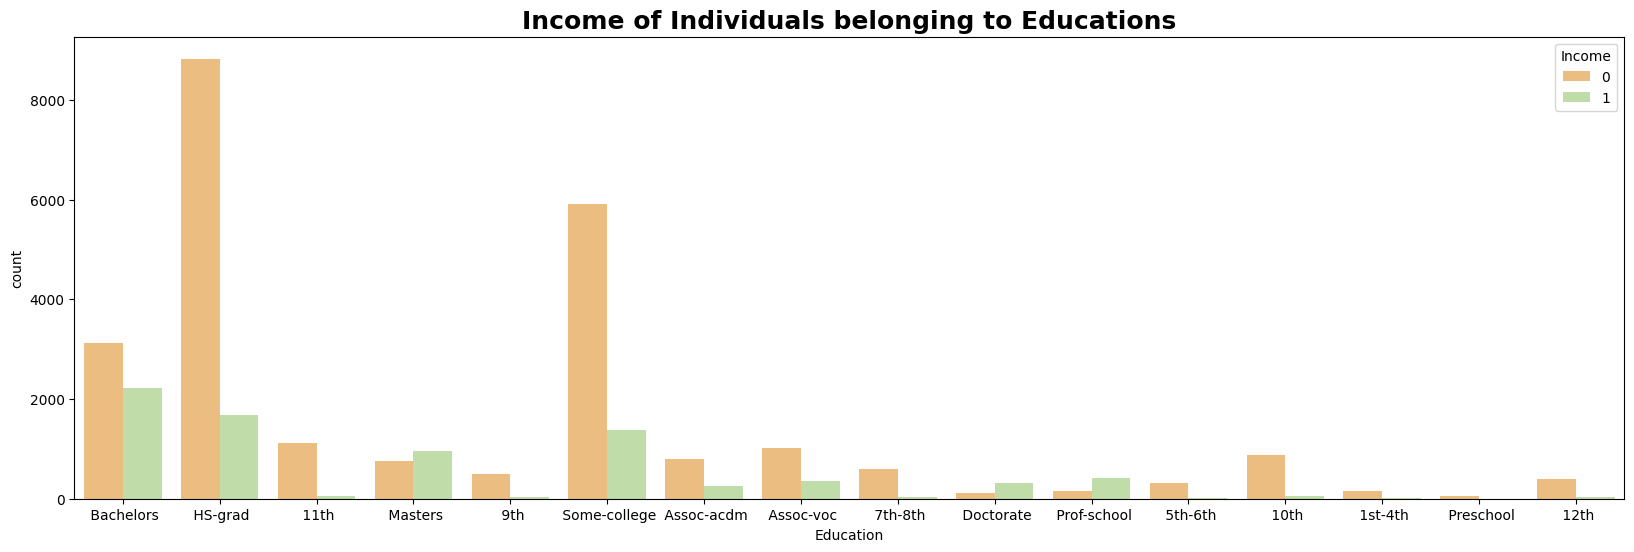

In [ ]:
plt.figure(figsize=(20,6))   
sns.countplot(data = eda_dataset, x = 'Education', hue = 'Income', palette='Spectral')
plt.title('Income of Individuals belonging to Educations', fontsize=18, fontweight='bold')

From the above plot, we can understand that education plays a very important role in deciding the income. Most of the high earners (>50k) are highly educated having done Bachelors, Masters, Prof-school , Doctorate. One basic trend we can observe is the ratio of high earners (>50k) to low earners (<50k) increases with education level.

###Income distribution over Matiral Status

Text(0.5, 1.0, 'Income of Individuals belonging to different Martial Status')

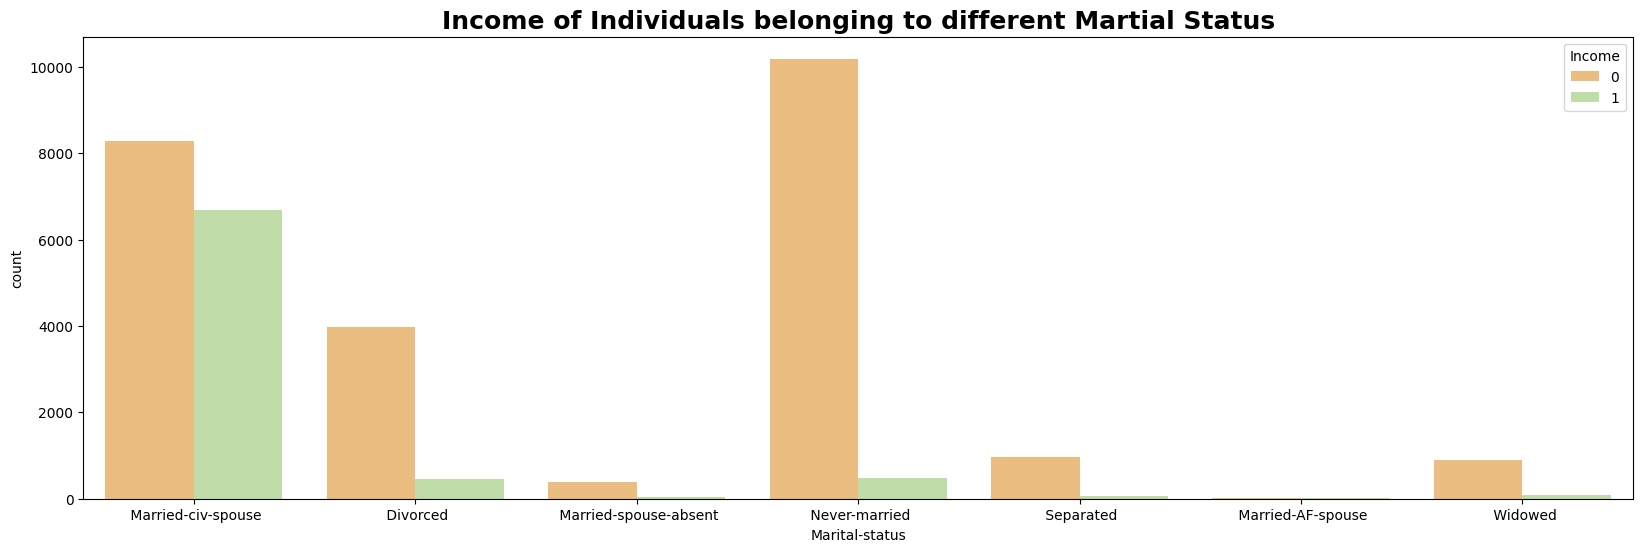

In [ ]:
plt.figure(figsize=(20,6))   
sns.countplot(data = eda_dataset, x = 'Marital-status', hue = 'Income', palette='Spectral')
plt.title('Income of Individuals belonging to different Martial Status', fontsize=18, fontweight='bold')

We can observe that the only marital group in which the high earners are almost at par with the low earners is the married-civ-spouse. My understanding would be as they have a civilian spouse, they must have families. To sustain these families, they would require a high paying job. 

###Income distribution over Occupation

Text(0.5, 1.0, 'Income of Individuals belonging to different Occupations')

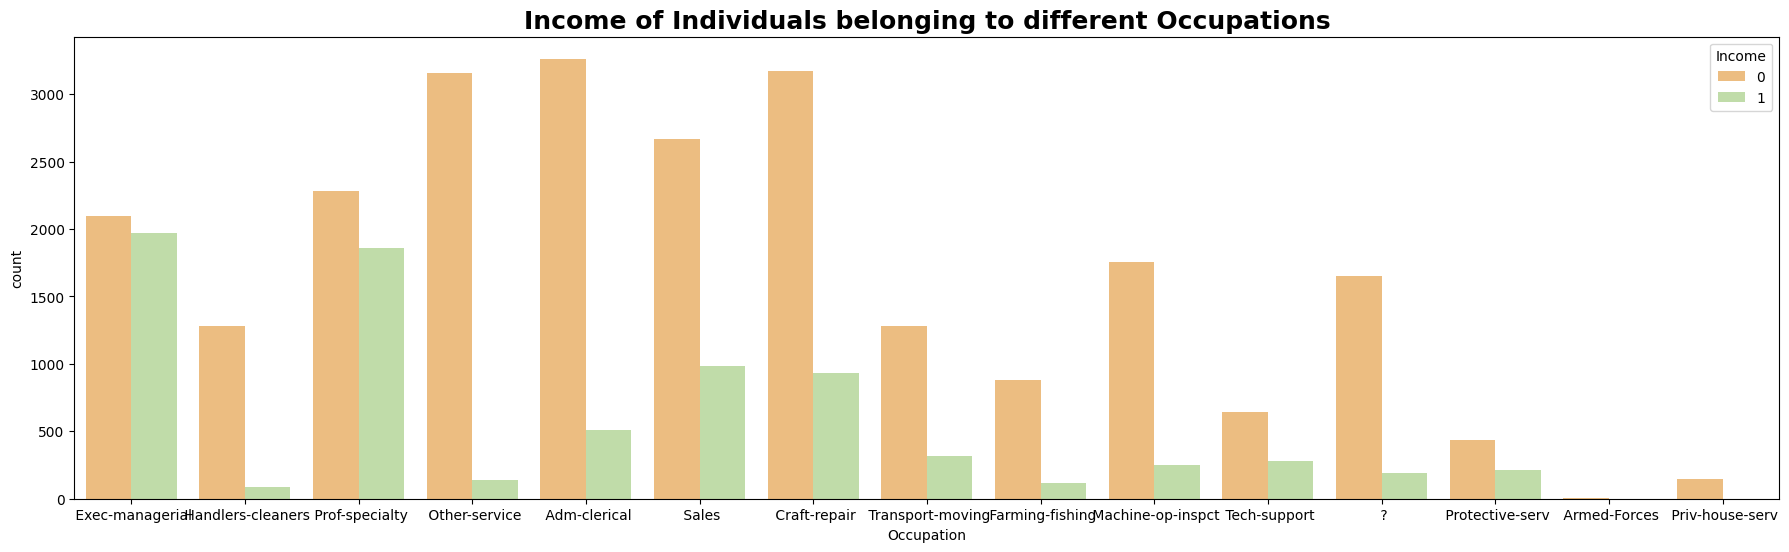

In [ ]:
plt.figure(figsize=(22,6))   
sns.countplot(data = eda_dataset, x = 'Occupation', hue = 'Income', palette='Spectral')
plt.title('Income of Individuals belonging to different Occupations', fontsize=18, fontweight='bold')

As we would expect, we get to see different income averages and ratios in different occupations. The most noteworthy are Exec-managerial and Prof-specialty.

###Income distribution over Occupation

Text(0.5, 1.0, 'Income of Individuals belonging to different Occupations')

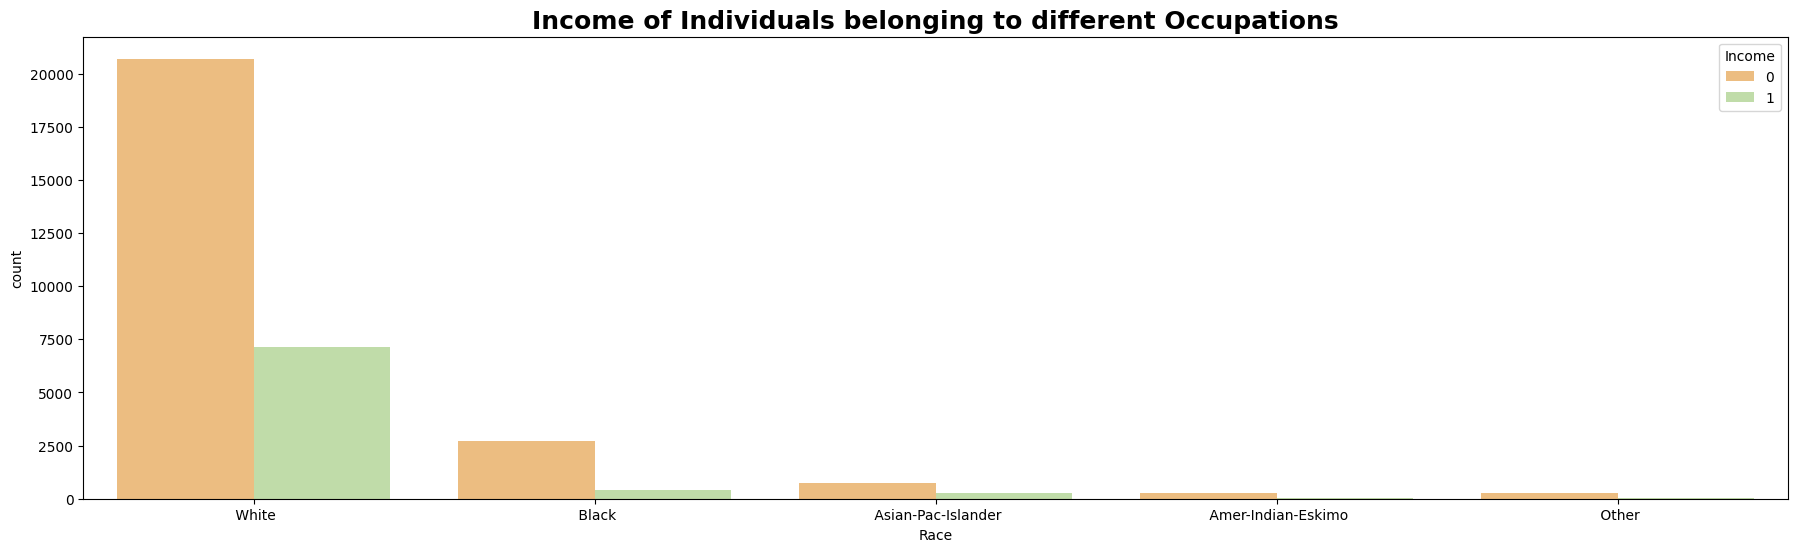

In [ ]:
plt.figure(figsize=(22,6))   
sns.countplot(data = eda_dataset, x = 'Race', hue = 'Income', palette='Spectral')
plt.title('Income of Individuals belonging to different Occupations', fontsize=18, fontweight='bold')

Due to limited amount of data on the other races, it is inappropriate to comment and generalize.

###Income distribution over Sex/Gender

Text(0.5, 1.0, 'Income of Individuals belonging to genders')

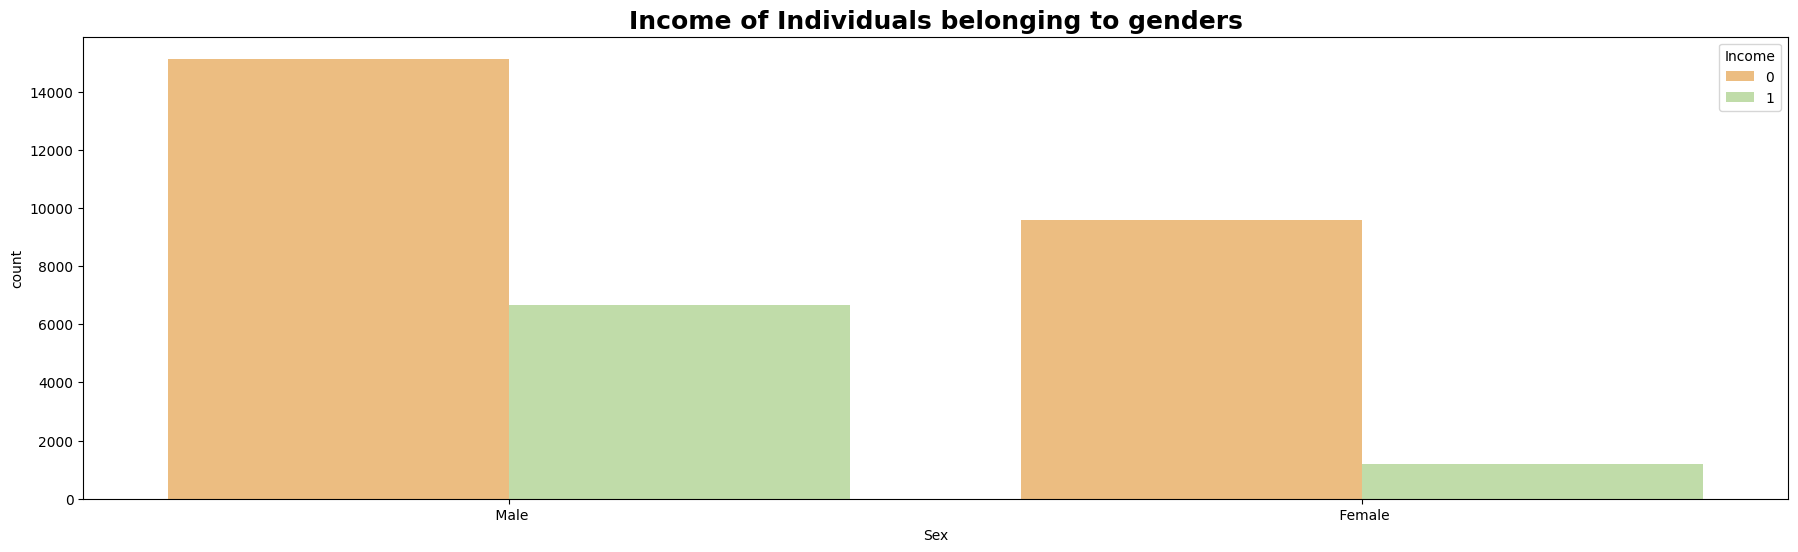

In [ ]:
plt.figure(figsize=(22,6))   
sns.countplot(data = eda_dataset, x = 'Sex', hue = 'Income', palette='Spectral')
plt.title('Income of Individuals belonging to genders', fontsize=18, fontweight='bold')

This chart can be used by pro-feminist people to showcase the disparity between the raio of high earners to low earners based on gender. However, it is important to note that this dataset may be biased towards a certain kind of people which may be based on race, locality, language, and luck! The dataset information provided does say it's a census, but it's unclear of where this census took place.

###Income distribution over Hours-per-week

Text(0.5, 1.0, 'Income of Individuals over number of Hours-per-week worked')

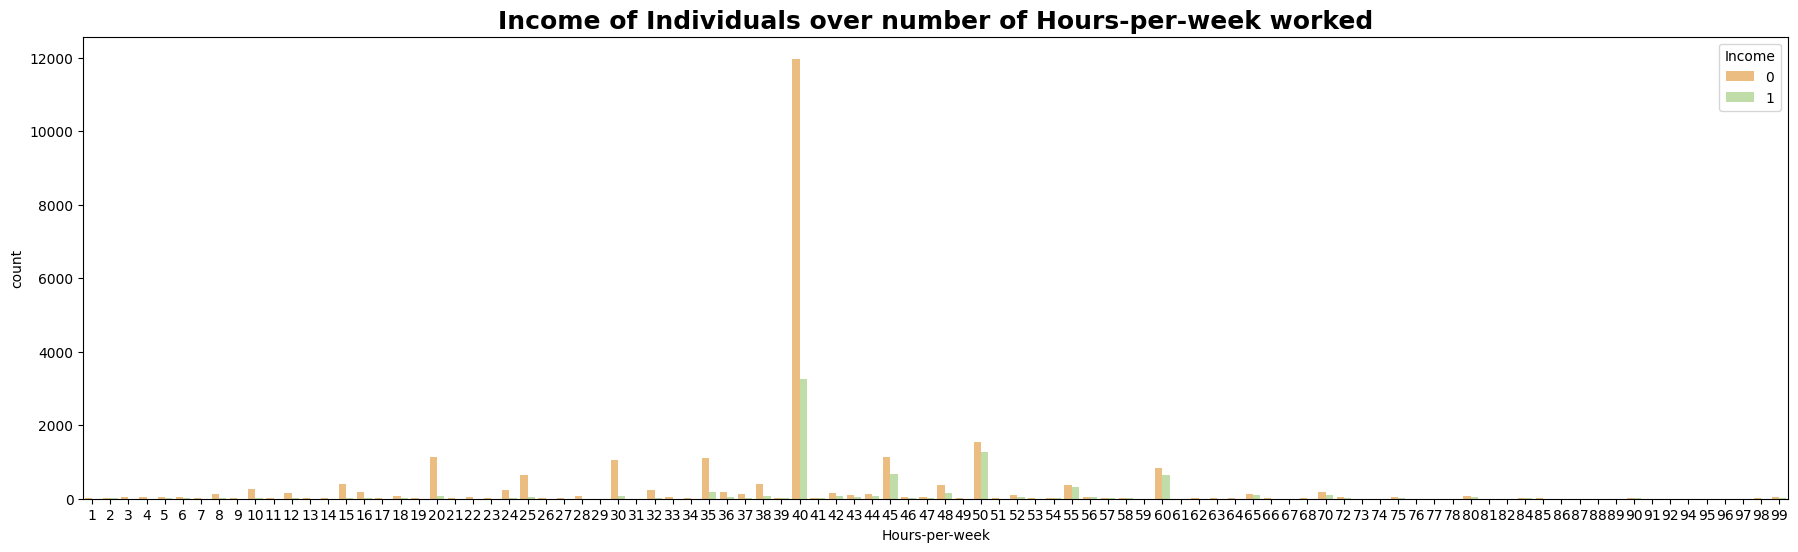

In [ ]:
plt.figure(figsize=(22,6))   
sns.countplot(data = eda_dataset, x = 'Hours-per-week', hue = 'Income', palette='Spectral')
plt.title('Income of Individuals over number of Hours-per-week worked', fontsize=18, fontweight='bold')

Nothing interesting can be inferred from this, other than the ratio of high earners to low earners consistently increases as the number of hours worked per weak increase, which makes sense.

###Income distribution over Native-country

Text(0.5, 1.0, 'Income of Individuals over Native-country')

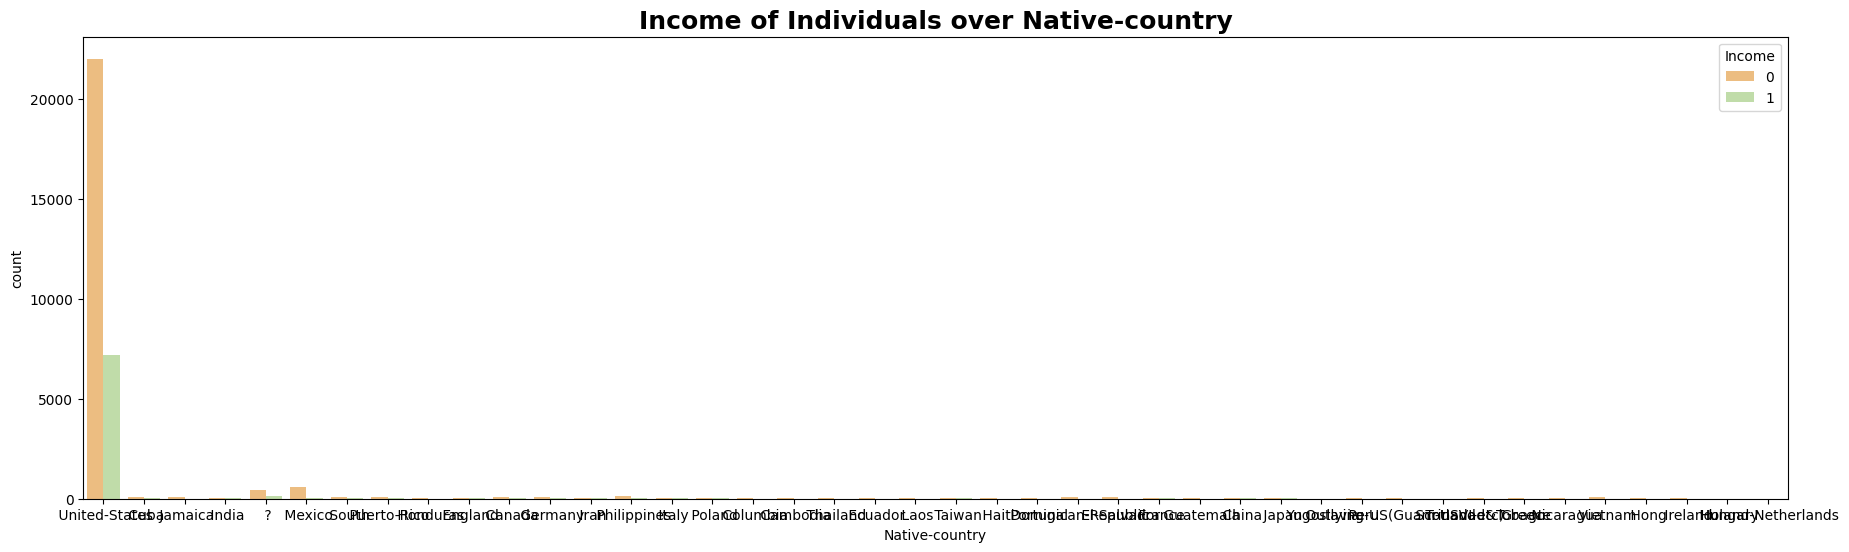

In [ ]:
plt.figure(figsize=(22,6))   
sns.countplot(data = eda_dataset, x = 'Native-country', hue = 'Income', palette='Spectral')
plt.title('Income of Individuals over Native-country', fontsize=18, fontweight='bold')

Not a lot can be inferred from this plot.

#Problem statement

Prediction task is to determine whether a person makes over 50K a year.
This can be done in 2 ways:
1) Perform regression and return Yes or No based on if predicted value is greater than 50k
2) Perform classification and return Yes or No

 **For this project, I will solve this problem statement using Classification.**
 I will be using F1 score as my evaluation metric.

#Feature selection


We have already performed one-hot encoding and continuous variable scaling to get the feature pdf in the data-preprocessing section.

In [ ]:
target = dataset['Income']

In [ ]:
target = target.reset_index(drop=True)
target

0        1
1        1
2        1
3        1
4        1
        ..
49433    0
49434    0
49435    0
49436    0
49437    0
Name: Income, Length: 49438, dtype: int64

In [ ]:
#The df is the combined pdf of categorical features which have been one-hot-encoded and the continuous features which have been
#scaled using StandardScaler.

df.shape, target.shape

((49438, 102), (49438,))

##Variance Thresholding

First thing I tried was to remove the features which have same value in over 90% examples, ie low variance. For this I used VarianceThreshold from sklearn.feature_selection, however it will remove the one-hot features which have the presense of a particular feature as well, which would lead to information loss. If there was a convenient way to just target the columns that had 90% or more zeroes, it would be applicable in this case.

In [ ]:
# from sklearn.feature_selection import VarianceThreshold

# sel = VarianceThreshold()

# df = sel.fit_transform(df)

In [ ]:
# df.shape

##I implemented Univariate Feature selection for feature selection using selectkbest from sklearn and f_classif as the scoring function.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

new_df_30 = SelectKBest(f_classif, k=30).fit_transform(df, target)
new_df_50 = SelectKBest(f_classif, k=50).fit_transform(df, target)

In [ ]:
new_df_30.shape, new_df_50.shape

((49438, 30), (49438, 50))

#Comparing different models

In [ ]:
df.shape, new_df_30.shape, new_df_50.shape, target.shape

((49438, 102), (49438, 30), (49438, 50), (49438,))

##MLP model for classification, F1 Score: 0.852

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, target,test_size=.2,random_state =123)

# Define the model
model = Sequential()
model.add(Dense(51, input_dim=df.shape[1], activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Epoch 1/15
989/989 [==============================] - 3s 2ms/step - loss: 0.3943 - accuracy: 0.8155 - val_loss: 0.3734 - val_accuracy: 0.8305
Epoch 2/15
989/989 [==============================] - 2s 2ms/step - loss: 0.3596 - accuracy: 0.8338 - val_loss: 0.3691 - val_accuracy: 0.8345
Epoch 3/15
989/989 [==============================] - 2s 2ms/step - loss: 0.3514 - accuracy: 0.8384 - val_loss: 0.3656 - val_accuracy: 0.8326
Epoch 4/15
989/989 [==============================] - 3s 3ms/step - loss: 0.3459 - accuracy: 0.8422 - val_loss: 0.3632 - val_accuracy: 0.8386
Epoch 5/15
989/989 [==============================] - 2s 2ms/step - loss: 0.3408 - accuracy: 0.8467 - val_loss: 0.3640 - val_accuracy: 0.8408
Epoch 6/15
989/989 [==============================] - 2s 2ms/step - loss: 0.3357 - accuracy: 0.8485 - val_loss: 0.3595 - val_accuracy: 0.8406
Epoch 7/15
989/989 [==============================] - 2s 2ms/step - loss: 0.3298 - accuracy: 0.8489 - val_loss: 0.3618 - val_accuracy: 0.8350
Epoch 

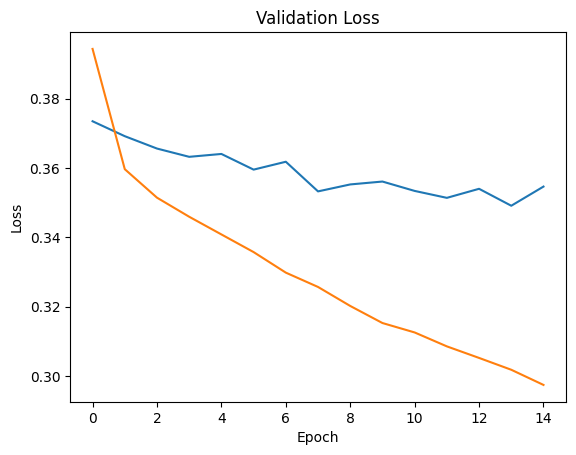

In [ ]:
#Plotting validation loss

plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
preds = model.predict(X_test)

309/309 [==============================] - 0s 1ms/step


In [ ]:
new_preds = np.where(preds > 0.5, 1, 0)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

print(confusion_matrix(new_preds, y_test))
print("accuracy is: ", accuracy_score(new_preds, y_test))
print("f1-score is: ", f1_score(new_preds, y_test))

[[4162  766]
 [ 832 4128]]
accuracy is:  0.8383899676375405
f1-score is:  0.8378323523442256


##Baseline model with all features, F1-score : 0.931

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, target,test_size=.2,random_state =123)


In [ ]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB


clf_rf = RandomForestClassifier()
clf_knn = KNeighborsClassifier()
clf_lda = LinearDiscriminantAnalysis()
clf_bc = BaggingClassifier()
clf_nb = GaussianNB()

clf_rf.fit(X_train, y_train)
clf_knn.fit(X_train, y_train)
clf_lda.fit(X_train, y_train)
clf_bc.fit(X_train, y_train)
clf_nb.fit(X_train, y_train)

preds_rf = clf_rf.predict(X_test)
preds_knn = clf_knn.predict(X_test)
preds_lda = clf_lda.predict(X_test)
preds_bc = clf_bc.predict(X_test)
preds_nb = clf_nb.predict(X_test)


In [ ]:
preds_rf.shape,preds_knn.shape,preds_lda.shape,preds_bc.shape,preds_nb.shape, y_test.shape

((9888,), (9888,), (9888,), (9888,), (9888,), (9888,))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

print("For Random Forest")
print(confusion_matrix(preds_rf, y_test))
print("accuracy is: ", accuracy_score(preds_rf, y_test))
print("f1-score is: ", f1_score(preds_rf, y_test))

print("For Knn")
print(confusion_matrix(preds_knn, y_test))
print("accuracy is: ", accuracy_score(preds_knn, y_test))
print("f1-score is: ", f1_score(preds_knn, y_test))

print("For LDA")
print(confusion_matrix(preds_lda, y_test))
print("accuracy is: ", accuracy_score(preds_lda, y_test))
print("f1-score is: ", f1_score(preds_lda, y_test))

print("For Bagging Classifier")
print(confusion_matrix(preds_bc, y_test))
print("accuracy is: ", accuracy_score(preds_bc, y_test))
print("f1-score is: ", f1_score(preds_bc, y_test))

print("For Naive Bayes")
print(confusion_matrix(preds_nb, y_test))
print("accuracy is: ", accuracy_score(preds_nb, y_test))
print("f1-score is: ", f1_score(preds_nb, y_test))

For Random Forest
[[4418  123]
 [ 576 4771]]
accuracy is:  0.9293082524271845
f1-score is:  0.9317449467825407
For Knn
[[3886  450]
 [1108 4444]]
accuracy is:  0.8424352750809061
f1-score is:  0.8508520007658433
For LDA
[[3767  696]
 [1227 4198]]
accuracy is:  0.8055218446601942
f1-score is:  0.8136447330167653
For Bagging Classifier
[[4473  192]
 [ 521 4702]]
accuracy is:  0.9278923948220065
f1-score is:  0.9295245626173767
For Naive Bayes
[[1948  158]
 [3046 4736]]
accuracy is:  0.6759708737864077
f1-score is:  0.7472388766172294


From the above 5 classifications, the results obtained are:

**For Random Forest**

[[4435  118]

 [ 559 4776]]

accuracy is:  0.9315331715210357

f1-score is:  0.9338156222504643

**For Knn**

[[3886  450]

 [1108 4444]]

accuracy is:  0.8424352750809061

f1-score is:  0.8508520007658433

**For LDA**

[[3767  696]

 [1227 4198]]

accuracy is:  0.8055218446601942

f1-score is:  0.8136447330167653

**For Bagging Classifier**

[[4438  155]

 [ 556 4739]]

accuracy is:  0.9280946601941747

f1-score is:  0.9302188634802238

**For Naive Bayer**

[[1948  158]

 [3046 4736]]

accuracy is:  0.6759708737864077

f1-score is:  0.7472388766172294




Based on above results, I have decided to compare the proposed models with reduced features with the base model on Random Forest, where the base model obtained highest accuracy.

##Proposed model with 102 features reduced to 30, F1-score is: 0.899

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_df_30, target,test_size=.2,random_state =123)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

preds = clf.predict(X_test)


In [ ]:
preds.shape, y_test.shape

((9888,), (9888,))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

print(confusion_matrix(preds, y_test))
print("accuracy is: ", accuracy_score(preds, y_test))
print("f1-score is: ", f1_score(preds, y_test))

[[4226  263]
 [ 768 4631]]
accuracy is:  0.8957322006472492
f1-score is:  0.8998348392111144


##Proposed model with 102 features reduced to 50, F1-score is: 0.9167

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_df_50, target,test_size=.2,random_state =123)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

preds = clf.predict(X_test)


In [ ]:
preds.shape, y_test.shape

((9888,), (9888,))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

print(confusion_matrix(preds, y_test))
print("accuracy is: ", accuracy_score(preds, y_test))
print("f1-score is: ", f1_score(preds, y_test))

[[4337  194]
 [ 657 4700]]
accuracy is:  0.9139360841423948
f1-score is:  0.9169837089064482


#Unsupervised-Supervised Pipeline

For the unsupervised part, I have decided compare kmeans/kprototypes. It is performs well on datsets which contain continuous as well as categorical values out of the box. 

The pipeline would be :

-> Send orignal dataframe to the kmodes clustering to get cluster for each point
-> Seperate the different clusters into their own datasets
-> Perform supervised learning (Random Forest performed the best on entire dataset, so it will be used here as well to have consistency)
-> Compare the accuracy of each cluster with the accuracy obtained above for the entire dataset to see if the unsupervised-supervised approach helped in this problem statement.

In [ ]:
new_df_50.shape, df.shape

((49438, 50), (49438, 102))

For using k-means, We will check the appropriate amount of clusters using elbow method

In [ ]:
from sklearn.cluster import KMeans
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(new_df_50) 
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

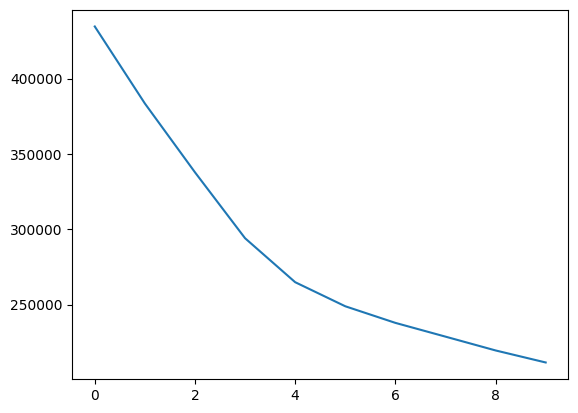

In [ ]:
plt.plot(wcss)

I wanted to try different clustering techniques, however the colab notebook kept crashing when i tried spectral clustering, agglomerative clustering, and even k-means on the 102 featured dataset. That is why i performed k-means on the new dataset containing the most relevant 50 features of the original dataset.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(new_df_50)
# kmeans = AgglomerativeClustering(n_clusters=2).fit(new_df_30)

In [ ]:
clusters = kmeans.labels_

In [ ]:
new_df_50 = pd.DataFrame(new_df_50)

new_df_50['cluster'] = clusters
new_df_50['target'] = target

(array([19302.,     0.,     0.,     0.,     0., 26929.,     0.,     0.,
            0.,  3207.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

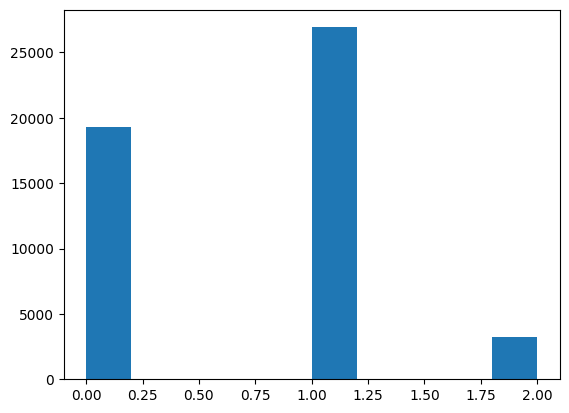

In [ ]:
plt.hist(new_df_50['cluster'])


In [ ]:
cluster0_df = new_df_50[new_df_50['cluster']==0]
cluster1_df = new_df_50[new_df_50['cluster']==1]
cluster2_df = new_df_50[new_df_50['cluster']==2]

In [ ]:
new_df_50.shape

(49438, 52)

In [ ]:
cluster0_df.shape, cluster1_df.shape, cluster2_df.shape


((19302, 52), (26929, 52), (3207, 52))

In [ ]:
cluster_list = [cluster0_df, cluster1_df, cluster2_df]

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix

for cluster in cluster_list:
  X = cluster.drop(['cluster', 'target'], axis = 1)
  y = cluster['target']
  print("dataframe size: ", X.shape, y.shape)
  X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state =123)

  clf = RandomForestClassifier()
  clf.fit(X_train, y_train)
  print("X_test size: ", X_test.shape)
  pred = clf.predict(X_test)

  print("f1 score is: ", f1_score(pred, y_test))
  print("confusion matrix is: ", confusion_matrix(pred, y_test))

dataframe size:  (19302, 50) (19302,)
X_test size:  (3861, 50)
f1 score is:  0.9035769828926906
confusion matrix is:  [[3156   42]
 [  82  581]]
dataframe size:  (26929, 50) (26929,)
X_test size:  (5386, 50)
f1 score is:  0.9077766699900299
confusion matrix is:  [[1004  157]
 [ 583 3642]]
dataframe size:  (3207, 50) (3207,)
X_test size:  (642, 50)
f1 score is:  0.9902152641878669
confusion matrix is:  [[126   3]
 [  7 506]]


As we can see, we get a total average accuracy of 93.2% which outperforms our base line model on 50 features. Also we get a specialized cluster classifier which has an accuracy of 99% on the cluster.

###Using Kmodes

In [ ]:
category_idx = list(map(lambda x: x, range(5, 50)))

In [ ]:
new_df_50[0]

array([-0.11227662, -0.22631352, -0.1941662 , -0.26160877, -0.17508599,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  1.        ,  0.        ,  1.        ])

In [ ]:
# pip install kmodes

In [ ]:
from kmodes.kprototypes import KPrototypes

In [ ]:
kproto = KPrototypes(n_clusters = 2,verbose = 2, max_iter = 10)
clusters = kproto.fit_predict(new_df_50, categorical = category_idx)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/10, moves: 6308, ncost: 333042.6907569098
Run: 1, iteration: 2/10, moves: 8262, ncost: 324419.72684487817
Run: 1, iteration: 3/10, moves: 4388, ncost: 322494.8216004666
Run: 1, iteration: 4/10, moves: 1837, ncost: 322188.53349730605
Run: 1, iteration: 5/10, moves: 769, ncost: 322141.8921242004
Run: 1, iteration: 6/10, moves: 286, ncost: 322134.42457600037
Run: 1, iteration: 7/10, moves: 106, ncost: 322132.5352757821
Run: 1, iteration: 8/10, moves: 54, ncost: 322132.1359385783
Run: 1, iteration: 9/10, moves: 125, ncost: 322129.9950293023
Run: 1, iteration: 10/10, moves: 42, ncost: 322129.4863422892
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/10, moves: 8219, ncost: 323246.5426572786
Run: 2, iteration: 2/10, moves: 2768, ncost: 322388.58813129726
Run: 2, ite

In [ ]:
cluster_dict = []
for c in clusters:
  cluster_dict.append(c)

In [ ]:
len(cluster_dict)

49438

In [ ]:
new_df_50 = pd.DataFrame(new_df_50)

In [ ]:
new_df_50['cluster'] = cluster_dict
new_df_50['target'] = target

Cluster distribution:

(array([46222.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  3216.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

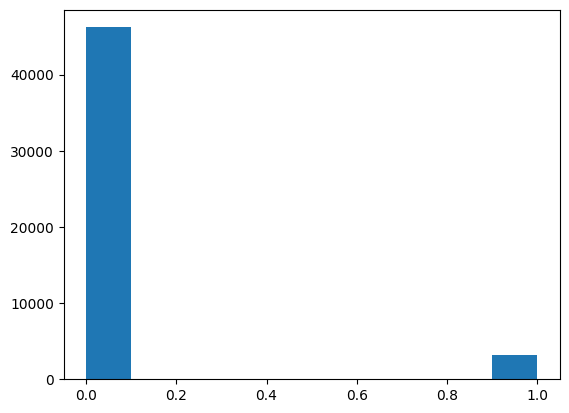

In [ ]:
plt.hist(new_df_50['cluster'])

In [ ]:
new_df_50.shape

(49438, 50)

In [ ]:
cluster0_df = new_df_50[new_df_50['cluster']==0]
cluster1_df = new_df_50[new_df_50['cluster']==1]

In [ ]:
cluster0_df.shape, cluster1_df.shape

((46222, 52), (3216, 52))

In [ ]:
cluster_list = [cluster0_df, cluster1_df]

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

for cluster in cluster_list:
  X = cluster.drop(['cluster', 'target'], axis = 1)
  y = cluster['target']
  print(X.shape, y.shape)
  X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state =123)

  clf = RandomForestClassifier()
  clf.fit(X_train, y_train)

  pred = clf.predict(X_test)

  print("f1 score is: ", f1_score(pred, y_test))

(46222, 50) (46222,)
f1 score is:  0.9095338279260325
(3216, 50) (3216,)
f1 score is:  0.9842829076620826


#Conclusion

In this notebook we have performed an indepth analysis of the adult dataset and concluded that feature selection leads to information loss, which in turn leads to a slightly lower accuracy (roughly 1%). However, we have reduced the features by half (from 102 to 50) and still maintained a healthy 91.9% accuracy on the reduced feature dataset (down from 93.1). This 1% trade off is benificial as it saves a lot of computational resources.

In [ ]:
# Create and fit selector
selector = SelectKBest(f_classif, k=30)
selector.fit(df, target)
# Get columns to keep and create new dataframe with those only
cols_idxs = selector.get_support(indices=True)
features_df_new_5 = df.iloc[:,cols_idxs]

features_df_new_5.columns

Index(['Age', 'Education-number', 'Capital-gain', 'Capital-loss',
       'Hours-per-week', ' Self-emp-inc', ' Bachelors', ' Doctorate',
       ' HS-grad', ' Masters', ' Prof-school', 'School', ' Divorced',
       ' Married-civ-spouse', ' Never-married', ' ?', ' Adm-clerical',
       ' Exec-managerial', ' Handlers-cleaners', ' Other-service',
       ' Prof-specialty', ' Husband', ' Not-in-family', ' Other-relative',
       ' Own-child', ' Unmarried', ' Wife', ' Black', ' Female', ' Male'],
      dtype='object')

The most important features that can be used to predict are the first 10 features in the above list which I would consider, which comprise of age, educational background, and sector of employment which is consistent with my experience. 

Even though I was not able to get better accuracy results after clustering and classification in the bigger picture, it was definitely exciting and knowledgable to try this method out. I am excited to test this method out on different datasets as it makes intuitive sense to me as a model will perform better and have well adjusted weights rather than overtrained or generalized weights for seperate clusters. 